In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as mpt
import pandas as pd

In [2]:
#loading the dataset
data_set = pd.read_csv('Assignment_Dataset.csv')
#displaying first 5 rows with column names
data_set.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
#descriptive overview of the dataset
data_set.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
#deleting the education column as its irrelevant for the given analysis
data_set.drop('education', inplace=True, axis='columns')

In [6]:
#Handle missing values
data_set.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
#Using median method for non-categorical variables
data_set['cigsPerDay'] = data_set['cigsPerDay'].fillna(data_set['cigsPerDay'].median())
data_set['totChol'] = data_set['totChol'].fillna(data_set['totChol'].median())
data_set['BMI'] = data_set['BMI'].fillna(data_set['BMI'].median())
data_set['heartRate'] = data_set['heartRate'].fillna(data_set['heartRate'].median())
data_set['glucose'] = data_set['glucose'].fillna(data_set['glucose'].median())
#Using mode method for categorical variable
data_set['BPMeds'] = data_set['BPMeds'].fillna(data_set['BPMeds'].mode()[0])
data_set.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
#Correlation matrix
data_set.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.029014,0.197026,0.314849,-0.051544,-0.004550,0.005853,0.015693,-0.069643,-0.035879,0.058199,0.081852,-0.116933,0.009970,0.088374
age,-0.029014,1.000000,-0.213662,-0.192017,0.121011,0.057679,0.306799,0.101314,0.260527,0.394053,0.205586,0.135470,-0.012868,0.117878,0.225408
currentSmoker,0.197026,-0.213662,1.000000,0.760326,-0.048348,-0.032980,-0.103710,-0.044285,-0.046391,-0.130281,-0.107933,-0.167368,0.062661,-0.055082,0.019448
cigsPerDay,0.314849,-0.192017,0.760326,1.000000,-0.044697,-0.032248,-0.065541,-0.036173,-0.027134,-0.088393,-0.056768,-0.092647,0.074258,-0.056792,0.058729
BPMeds,-0.051544,0.121011,-0.048348,-0.044697,1.000000,0.114614,0.258580,0.051407,0.078642,0.251479,0.192254,0.099617,0.015139,0.049142,0.086448
prevalentStroke,-0.004550,0.057679,-0.032980,-0.032248,0.114614,1.000000,0.074791,0.006955,0.000160,0.057000,0.045153,0.024283,-0.017672,0.018730,0.061823
prevalentHyp,0.005853,0.306799,-0.103710,-0.065541,0.258580,0.074791,1.000000,0.077752,0.162696,0.696656,0.615840,0.300537,0.146751,0.083406,0.177458
diabetes,0.015693,0.101314,-0.044285,-0.036173,0.051407,0.006955,0.077752,1.000000,0.040186,0.111265,0.050260,0.086058,0.048989,0.606495,0.097344
totChol,-0.069643,0.260527,-0.046391,-0.027134,0.078642,0.000160,0.162696,0.040186,1.000000,0.207350,0.163408,0.115035,0.090541,0.045677,0.081749
sysBP,-0.035879,0.394053,-0.130281,-0.088393,0.251479,0.057000,0.696656,0.111265,0.207350,1.000000,0.783952,0.325087,0.182052,0.135091,0.216374


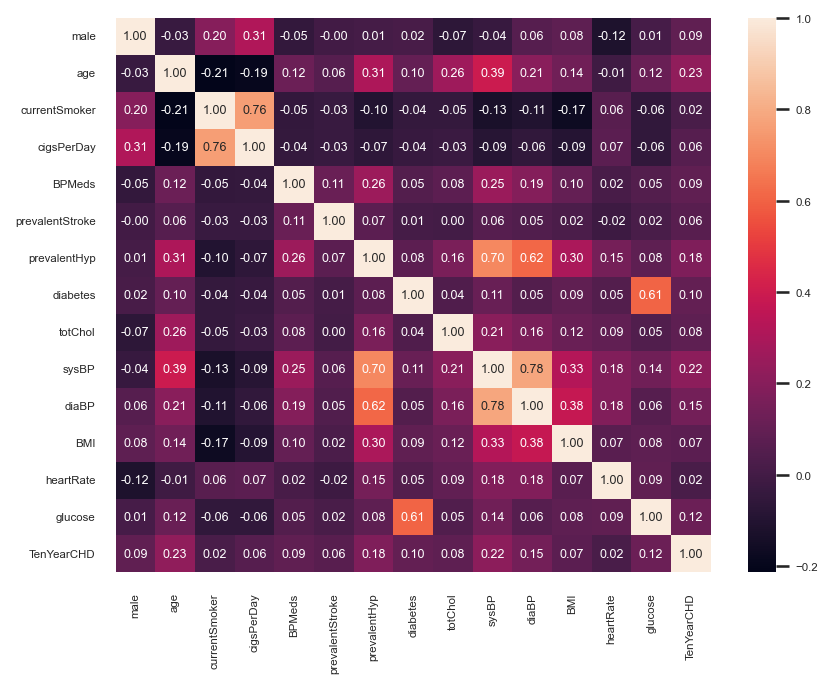

In [9]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=150)
sns.set(font_scale=0.5)
sns.heatmap(data_set.corr(), annot=True, fmt='.2f', annot_kws={"size":6})
plt.show()

In [10]:
#from the above correlation heatmap, it is observed that 
#1)currentSmoker, cigsPerDay, prevelantHyptertension, sysBP and diaBP are highly correlated with values over 0.70
#2)diabetes and glucose are correlated to some extent with values around 0.60

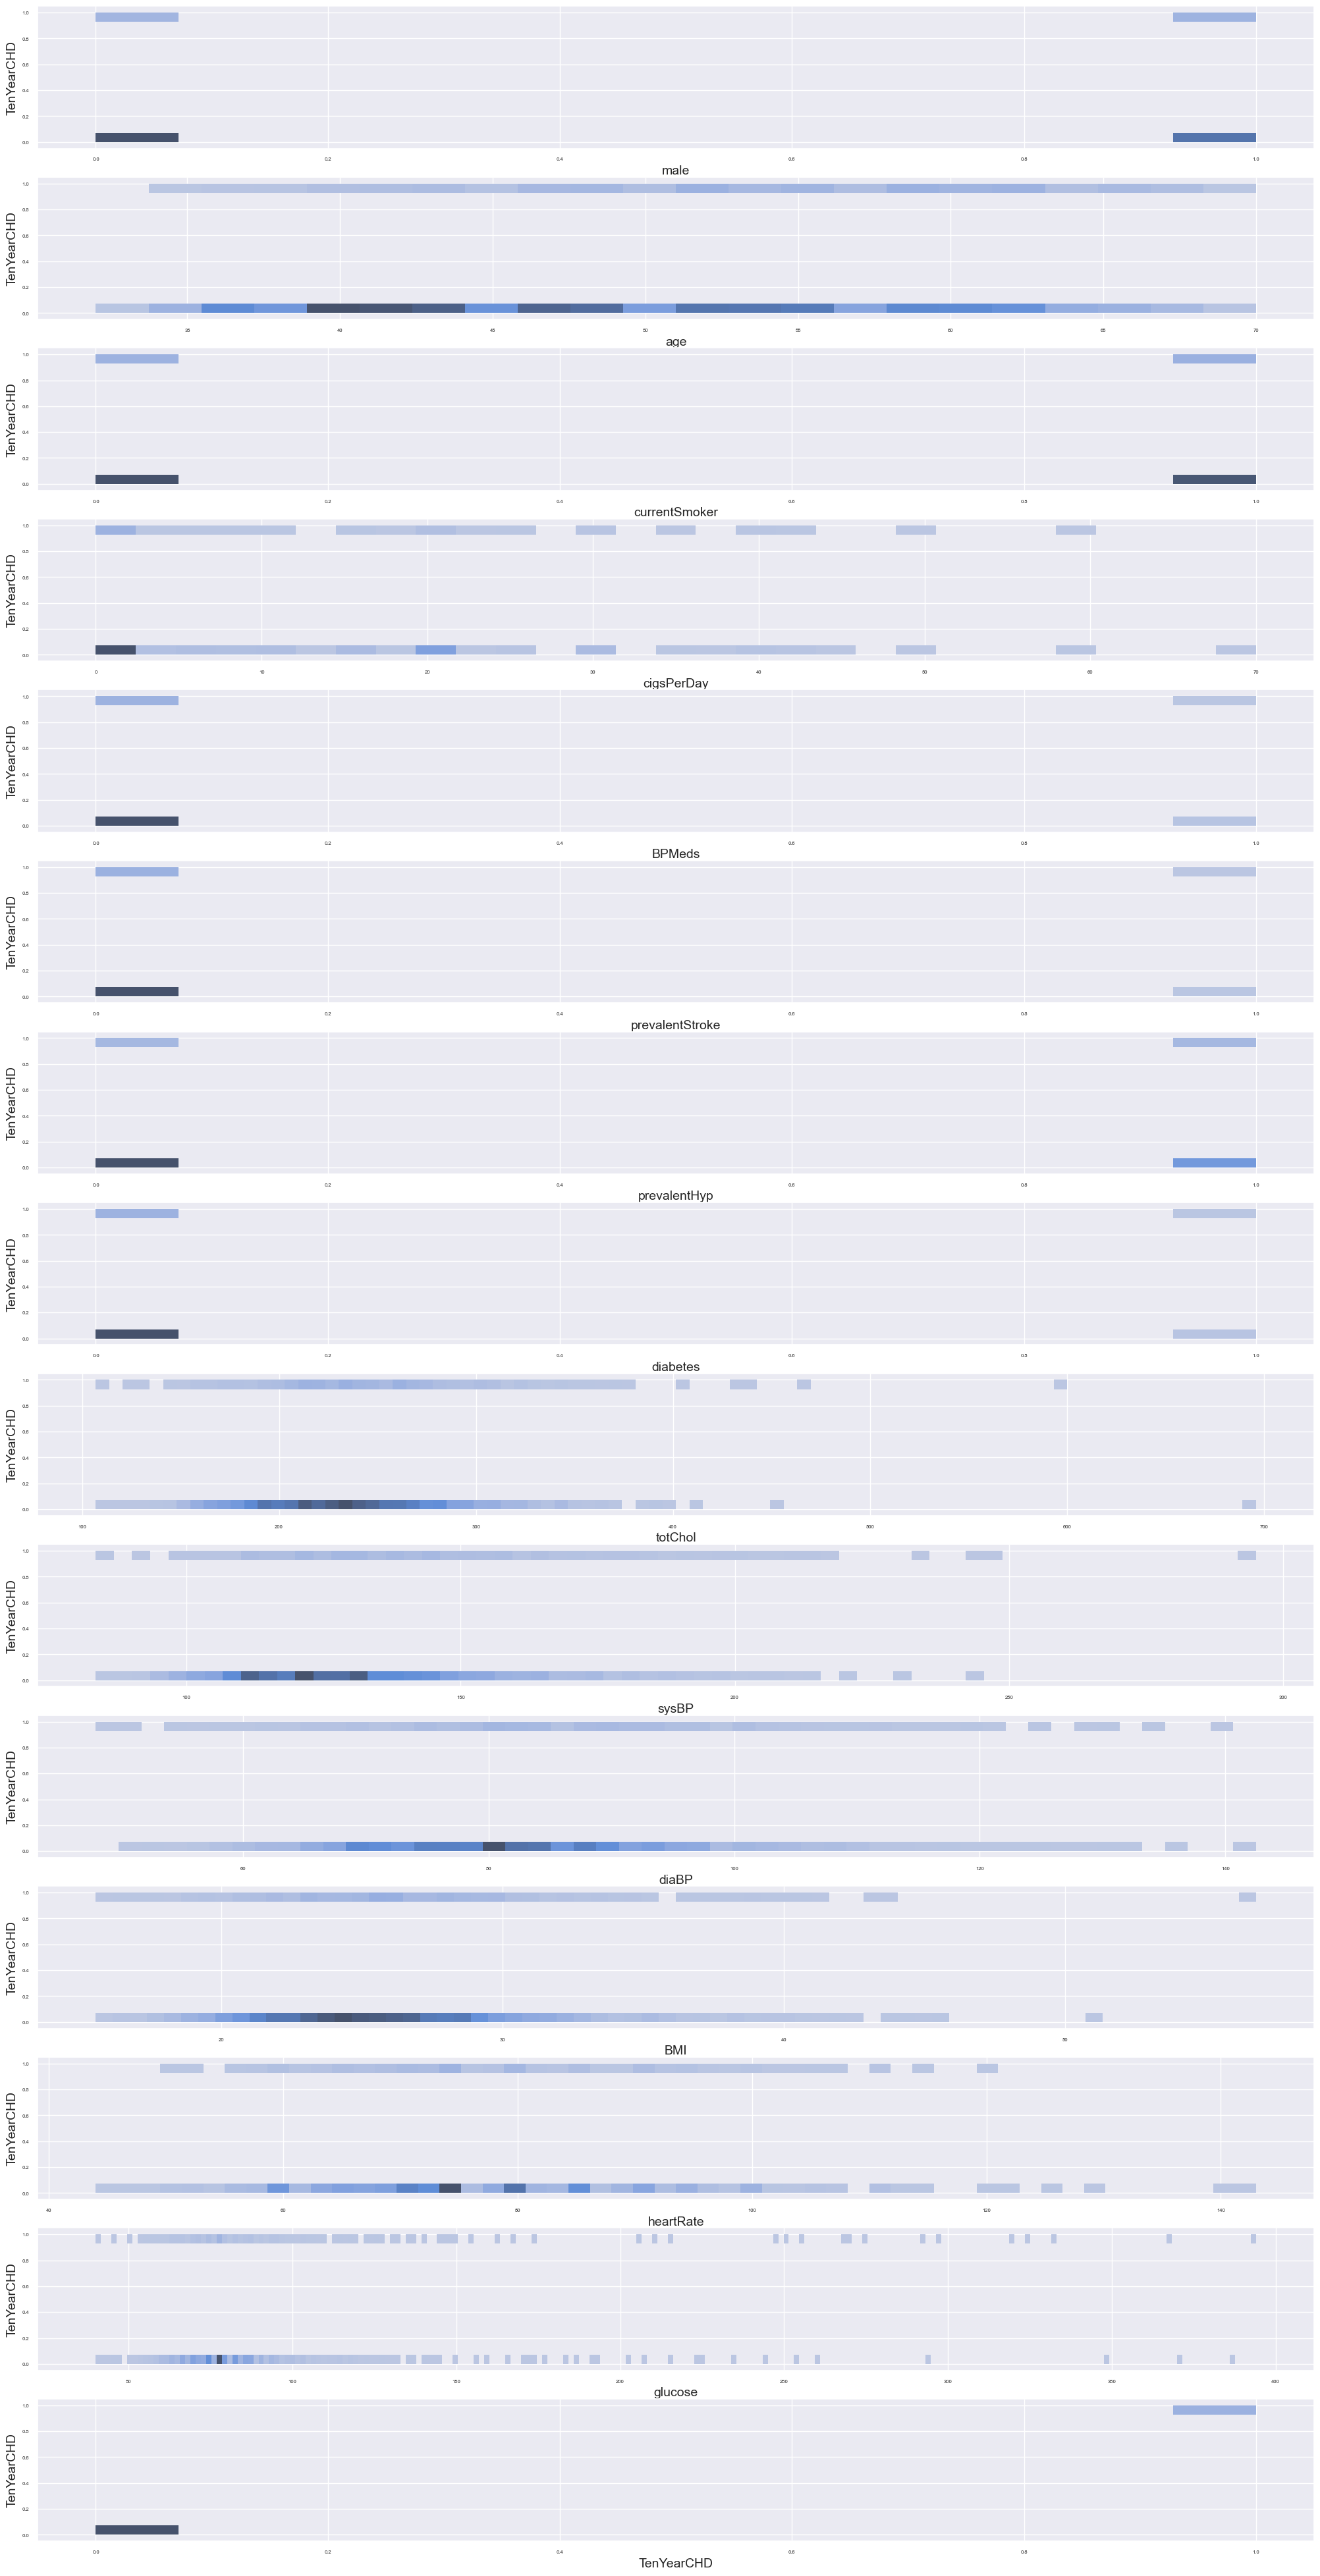

In [11]:
# Create a list of all the variables
variables = list(data_set.columns)
# Create a figure
fig, axes = plt.subplots(len(variables), 1, figsize=(25, 50))
# Plot a histogram for each variable against the target variable
for i, variable in enumerate(variables):
    sns.histplot(data=data_set, x=variable, y='TenYearCHD', ax=axes[i])
# Add a title and labels to each subplot
for i, ax in enumerate(axes):
    ax.set_xlabel(variables[i], fontsize=14)
    ax.set_ylabel('TenYearCHD', fontsize=14)
# Show the plot
#plt.rcParams.update({'font.size': 20})
plt.show()

In [12]:
#extracting independent variables
x = data_set.iloc[:,:-1]

In [13]:
#extracting dependent(target) variable
y = data_set.iloc[:,14]

In [14]:
#selecting the most important features for prediction CHD using Chi square method
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(11,'Score'))  

           Features       Score
9             sysBP  727.935535
13          glucose  399.565953
1               age  319.266019
8           totChol  235.210225
3        cigsPerDay  231.669558
10            diaBP  152.748563
6      prevalentHyp   92.048736
7          diabetes   39.144944
4            BPMeds   30.759595
0              male   18.899930
5   prevalentStroke   16.109887


In [15]:
#creating a new data set with selected features
data_set1 = data_set[['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp','TenYearCHD']]
print("New data set shape: ", data_set1.shape)

New data set shape:  (4240, 8)


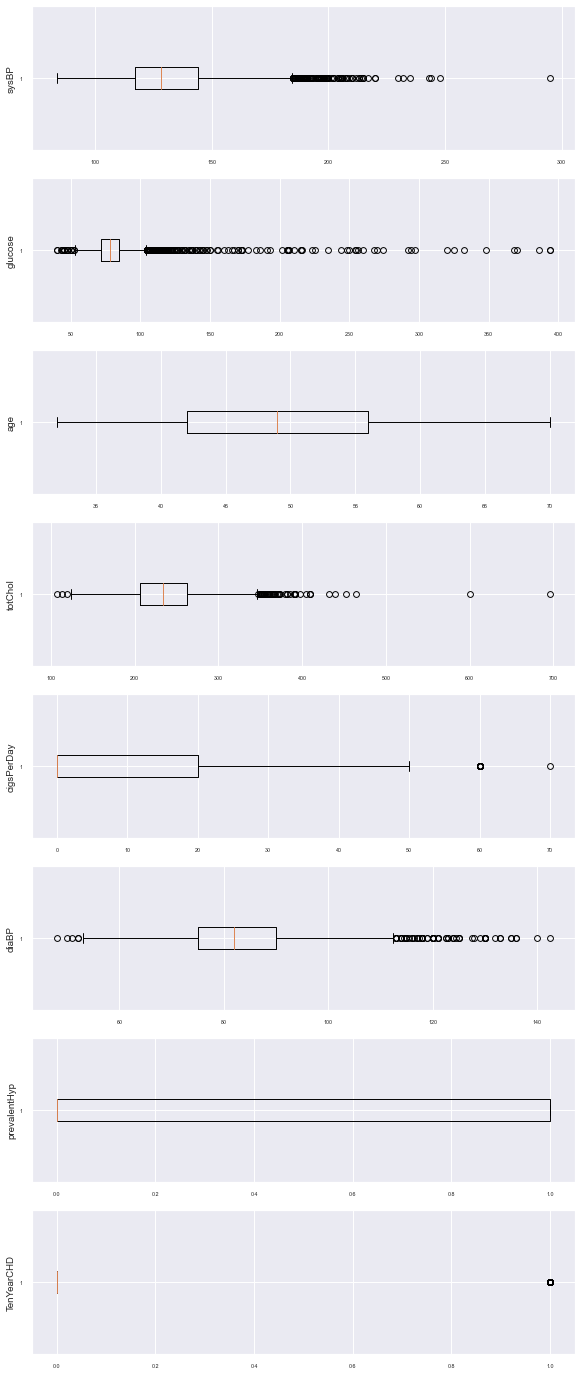

In [16]:
#checking for outliers in the new dataset
#Box plots
import matplotlib.pyplot as plt
fig, axs= plt.subplots(8,1,dpi=70, figsize=(10,25))
i=0
for col in data_set1.columns:
    axs[i].boxplot(data_set1[col], vert=False)
    axs[i].set_ylabel(col, fontsize=10)
    i+=1
plt.show()

In [17]:
#dropping outliers
data_set1 = data_set1.drop(data_set1[data_set1.sysBP > 280].index) # 1 entry will be deleted
data_set1 = data_set1.drop(data_set1[data_set1.totChol > 590].index) # 2 entry will be deleted
data_set1 = data_set1.drop(data_set1[data_set1.cigsPerDay > 69].index) # 1 entry will be deleted
data_set1.shape

(4236, 8)

In [18]:
#feature scaling
features = data_set1[['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp']]
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the data
scaler.fit(features)
# Transform the data
scaled_dataset = scaler.transform(features)

In [19]:
data_set1.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,TenYearCHD
count,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000,4236.000000
mean,132.304060,81.589707,49.578140,236.475921,8.934136,82.881138,0.309962,0.151558
std,21.894255,22.852780,8.572755,43.423628,11.871793,11.887592,0.462532,0.358634
min,83.500000,40.000000,32.000000,107.000000,0.000000,48.000000,0.000000,0.000000
25%,117.000000,72.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000
75%,143.625000,85.000000,56.000000,262.000000,20.000000,89.625000,1.000000,0.000000
max,248.000000,394.000000,70.000000,464.000000,60.000000,142.500000,1.000000,1.000000


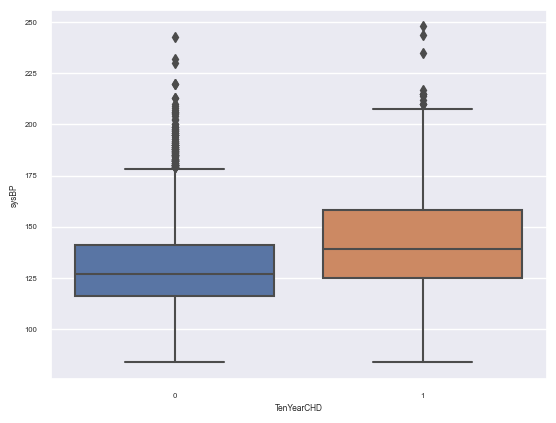

In [20]:
sns.boxplot(data=data_set1, y='sysBP', x='TenYearCHD')
plt.show()
#those with sysBP above 125 are mpre prone to CHD

<Axes: xlabel='glucose', ylabel='TenYearCHD'>

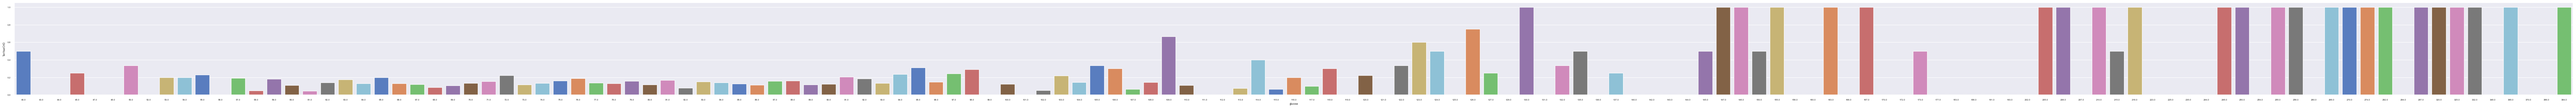

In [21]:
plt.figure(figsize=(110, 4))  #to increase the width of the plot, to see the glucose values clearly
sns.barplot(x="glucose", y="TenYearCHD", errorbar=None, palette="muted", data=data_set1)
#those with glucose levels above 150 are more lifely to suffer from CHD

<Axes: xlabel='TenYearCHD', ylabel='age'>

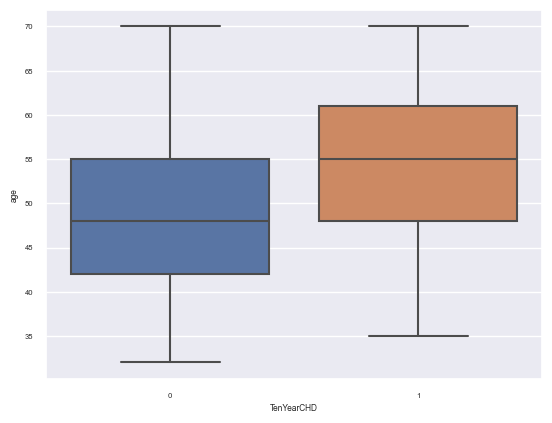

In [22]:
sns.boxplot(data=data_set1, y='age', x='TenYearCHD')
#those above 45 years old are more prone to CHD

<Axes: xlabel='TenYearCHD', ylabel='totChol'>

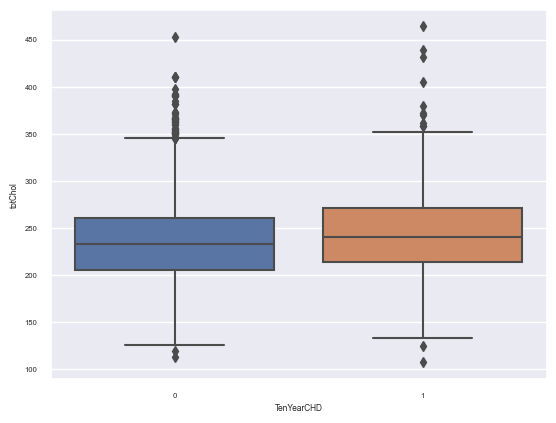

In [23]:
sns.boxplot(data=data_set1, y='totChol', x='TenYearCHD')
#cholestrol above 220 may increase the risk of CHD

<Axes: xlabel='cigsPerDay', ylabel='TenYearCHD'>

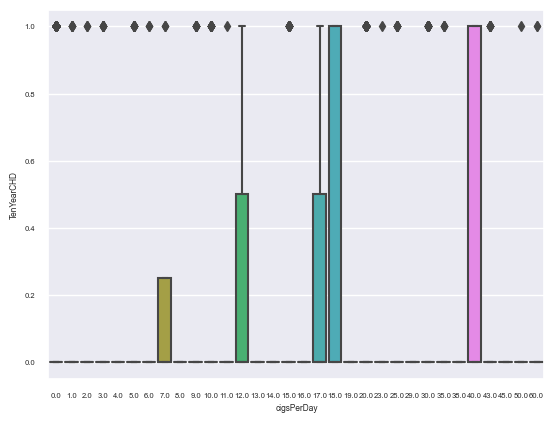

In [24]:
sns.boxplot(data=data_set1, x='cigsPerDay', y='TenYearCHD')
#more than 15 cigs per day increase the risk of CHD

<Axes: xlabel='diaBP', ylabel='TenYearCHD'>

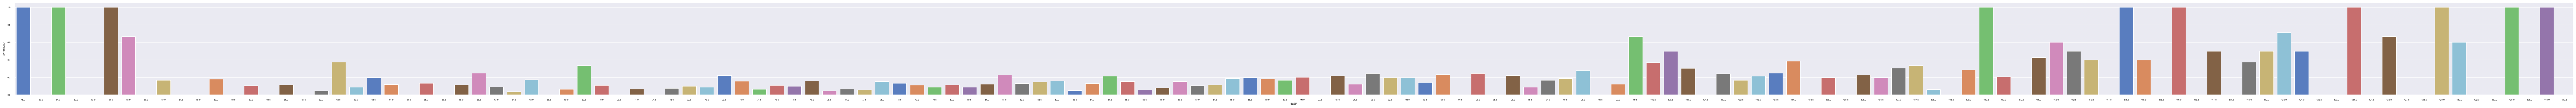

In [25]:
plt.figure(figsize=(110, 4))  #to increase the width of the plot, to see the diaBP values clearly
sns.barplot(x="diaBP", y="TenYearCHD", errorbar=None, palette="muted", data=data_set1)
#those with diaBP more than 110 are at higher risk of CHD

<Axes: xlabel='prevalentHyp', ylabel='TenYearCHD'>

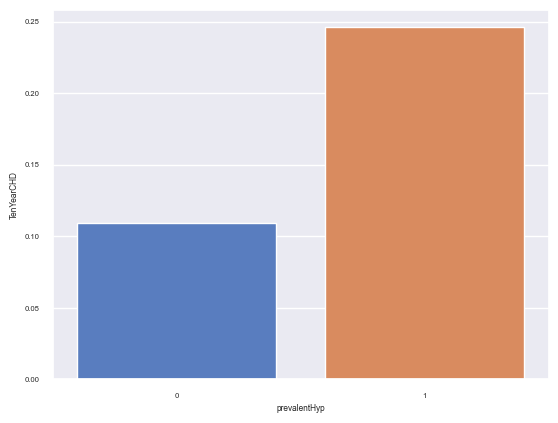

In [26]:
sns.barplot(x="prevalentHyp", y="TenYearCHD", errorbar=None, palette="muted", data=data_set1)
#hypertension greatly increases the chance of CHD

In [27]:
#extracting independent variables from 7 variable dataset 
x = scaled_dataset
#extracting dependent(target) variable from new dataset
y = data_set1.iloc[:,7]

In [28]:
#splitting independent variables (x) into training and test sets in the ratio 70:30
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
len(x_train), len(x_test), len(y_train), len(y_test)

(2965, 1271, 2965, 1271)

In [29]:
#Classification techniques
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Logistic regression
from sklearn.linear_model import LogisticRegression
LRclassifier=LogisticRegression(random_state=42)
LRclassifier.fit(x_train, y_train)
y_pred_LR=LRclassifier.predict(x_test)
LRcm = confusion_matrix(y_test, y_pred_LR)
LRaccuracy = accuracy_score(y_test, y_pred_LR)
LRprecision = precision_score(y_test, y_pred_LR)
LRrecall = recall_score(y_test, y_pred_LR)
LR_f1_score = f1_score(y_test, y_pred_LR)
print("Logistic regression Accuracy: ", LRaccuracy)
print("Logistic regression Precision: ", LRprecision)
print("Logistic regression Recall: ", LRrecall)
print("Logistic regression F1 score: ", LR_f1_score)

Logistic regression Accuracy:  0.8544453186467349
Logistic regression Precision:  0.7222222222222222
Logistic regression Recall:  0.06735751295336788
Logistic regression F1 score:  0.12322274881516589


In [30]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
KNNclassifier.fit(x_train, y_train)
y_pred_KNN= KNNclassifier.predict(x_test)
KNNcm = confusion_matrix(y_test, y_pred_KNN)
KNNaccuracy = accuracy_score(y_test, y_pred_KNN)
KNNprecision = precision_score(y_test, y_pred_KNN)
KNNrecall = recall_score(y_test, y_pred_KNN)
KNN_f1_score = f1_score(y_test, y_pred_KNN)
print("K nearest neighbors Accuracy: ", KNNaccuracy)
print("K nearest neighbors Precision: ", KNNprecision)
print("K nearest neighbors Recall: ", KNNrecall)
print("K nearest neighbors F1 score: ", KNN_f1_score)

K nearest neighbors Accuracy:  0.8347757671125098
K nearest neighbors Precision:  0.3950617283950617
K nearest neighbors Recall:  0.16580310880829016
K nearest neighbors F1 score:  0.23357664233576642


In [31]:
#Support vector machine
from sklearn.svm import SVC
SVCclassifier = SVC(kernel="poly", random_state=42)
SVCclassifier.fit(x_train,y_train)
y_pred_SVC= SVCclassifier.predict(x_test)

In [32]:
SVCcm = confusion_matrix(y_test, y_pred_SVC)
SVCaccuracy = accuracy_score(y_test, y_pred_SVC)
SVCprecision = precision_score(y_test, y_pred_SVC)
SVCrecall = recall_score(y_test, y_pred_SVC)
SVC_f1_score = f1_score(y_test, y_pred_SVC)
print("Support vector classification Accuracy: ", SVCaccuracy)
print("Support vector classification Precision: ", SVCprecision)
print("Support vector classification Recall: ", SVCrecall)
print("Support vector classification F1 score: ", SVC_f1_score)

Support vector classification Accuracy:  0.8520849724626278
Support vector classification Precision:  0.8571428571428571
Support vector classification Recall:  0.031088082901554404
Support vector classification F1 score:  0.06


In [33]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train, y_train)
y_pred_NB= NBclassifier.predict(x_test)
NBcm = confusion_matrix(y_test, y_pred_NB)
NBaccuracy = accuracy_score(y_test, y_pred_NB)
NBprecision = precision_score(y_test, y_pred_NB)
NBrecall = recall_score(y_test, y_pred_NB)
NB_f1_score = f1_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy: ", NBaccuracy)
print("Naive Bayes Precision: ", NBprecision)
print("Naive Bayes Recall: ", NBrecall)
print("Naive Bayes F1 score: ", NB_f1_score)

Naive Bayes Accuracy:  0.8151062155782848
Naive Bayes Precision:  0.36875
Naive Bayes Recall:  0.30569948186528495
Naive Bayes F1 score:  0.3342776203966005


In [34]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTclassifier.fit(x_train, y_train)
y_pred_DT= DTclassifier.predict(x_test)
DTcm = confusion_matrix(y_test, y_pred_DT)
DTaccuracy = accuracy_score(y_test, y_pred_DT)
DTprecision = precision_score(y_test, y_pred_DT)
DTrecall = recall_score(y_test, y_pred_DT)
DT_f1_score = f1_score(y_test, y_pred_DT)
print("Decision Tree Accuracy: ", DTaccuracy)
print("Decision Tree Precision: ", DTprecision)
print("Decision Tree Recall: ", DTrecall)
print("Decision Tree F1 score: ", DT_f1_score)

Decision Tree Accuracy:  0.7584579071597167
Decision Tree Precision:  0.2409090909090909
Decision Tree Recall:  0.27461139896373055
Decision Tree F1 score:  0.2566585956416465


In [35]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators=100, criterion="entropy")
RFclassifier.fit(x_train, y_train)
y_pred_RF= RFclassifier.predict(x_test)
RFcm = confusion_matrix(y_test, y_pred_RF)
RFaccuracy = accuracy_score(y_test, y_pred_RF)
RFprecision = precision_score(y_test, y_pred_RF)
RFrecall = recall_score(y_test, y_pred_RF)
RF_f1_score = f1_score(y_test, y_pred_RF)
print("Randon Forest Accuracy: ", RFaccuracy)
print("Randon Forest Precision: ", RFprecision)
print("Randon Forest Recall: ", RFrecall)
print("Randon Forest F1 score: ", RF_f1_score)

Randon Forest Accuracy:  0.8505114083398898
Randon Forest Precision:  0.5428571428571428
Randon Forest Recall:  0.09844559585492228
Randon Forest F1 score:  0.16666666666666666


In [36]:
data = {'Model':['Logistic Regression','K Nearest Neighbors', 'Support vector Machine', 'Naive Bayes', 'Decision Tree', 'Random Forest'],
        'Accuracies':[LRaccuracy*100, KNNaccuracy*100, SVCaccuracy*100, NBaccuracy*100, DTaccuracy*100, RFaccuracy*100],
       'Precision':[LRprecision*100, KNNprecision*100, SVCprecision*100, NBprecision*100, DTprecision*100, RFprecision*100],
       'Recall':[LRrecall*100, KNNrecall*100, SVCrecall*100, NBrecall*100, DTrecall*100, RFrecall*100],
       'F1 score':[LR_f1_score*100, KNN_f1_score*100, SVC_f1_score*100, NB_f1_score*100, DT_f1_score*100, RF_f1_score*100]}
model_acc_df = pd.DataFrame(data)
print(model_acc_df)

                    Model  Accuracies  Precision     Recall   F1 score
0     Logistic Regression   85.444532  72.222222   6.735751  12.322275
1     K Nearest Neighbors   83.477577  39.506173  16.580311  23.357664
2  Support vector Machine   85.208497  85.714286   3.108808   6.000000
3             Naive Bayes   81.510622  36.875000  30.569948  33.427762
4           Decision Tree   75.845791  24.090909  27.461140  25.665860
5           Random Forest   85.051141  54.285714   9.844560  16.666667


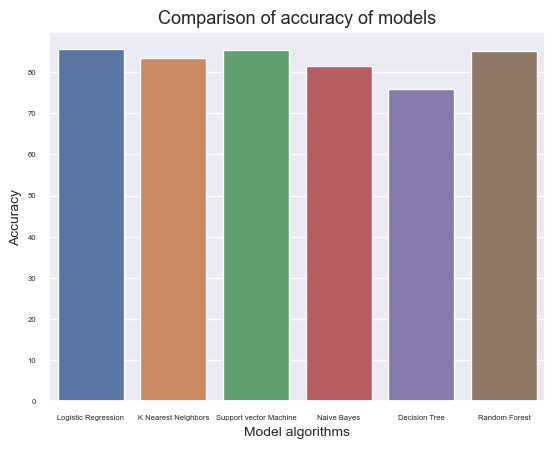

In [37]:
#Plotting model accuracies against models
plt.figure()
sns.barplot(x='Model', y='Accuracies', data=model_acc_df)
plt.title('Comparison of accuracy of models',fontsize=13)
plt.xlabel('Model algorithms', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.show()

In [38]:
# Based on the above analysis, it is concluded that
# Logistic Regression works best for the given dataset with good accuracy and F1 score.